In [0]:
# Import package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
%matplotlib inline

#Loading Data
RAW_BIKE_DATA = pd.read_csv('day.csv', header=0)
RAW_VIDEO_DATA = pd.read_csv('transcoding_mesurment.tsv', sep='\t', header=0)

In [3]:
RAW_BIKE_DATA.head(6)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606


In [4]:
RAW_VIDEO_DATA.head(6)

,id,duration,codec,width,height,bitrate,framerate,i,p,b,frames,i_size,p_size,b_size,size,o_codec,o_bitrate,o_framerate,o_width,o_height,umem,utime
0,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,1564,64483,825054,0,889537,mpeg4,56000,12.0,176,144,22508,0.612
1,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,1564,64483,825054,0,889537,mpeg4,56000,12.0,320,240,25164,0.980
2,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,1564,64483,825054,0,889537,mpeg4,56000,12.0,480,360,29228,1.216
3,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,1564,64483,825054,0,889537,mpeg4,56000,12.0,640,480,34316,1.692
4,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,1564,64483,825054,0,889537,mpeg4,56000,12.0,1280,720,58528,3.456
5,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,1564,64483,825054,0,889537,mpeg4,56000,12.0,1920,1080,102072,6.320


In [0]:
BIKE_DATA = RAW_BIKE_DATA.drop(['instant'], axis=1, inplace=False)
VIDEO_DATA = RAW_VIDEO_DATA.drop(['id'], axis=1, inplace=False)

### 3.1.1 Data Inspection

#### Q1: Heatmap

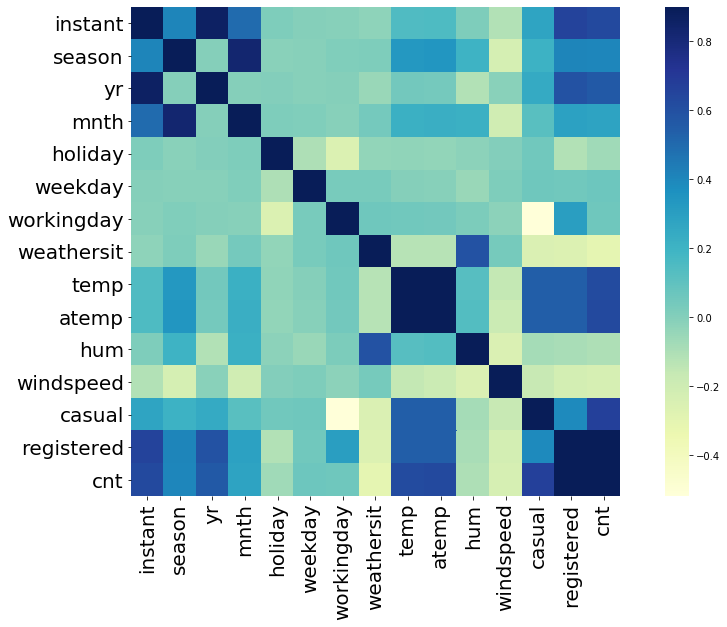

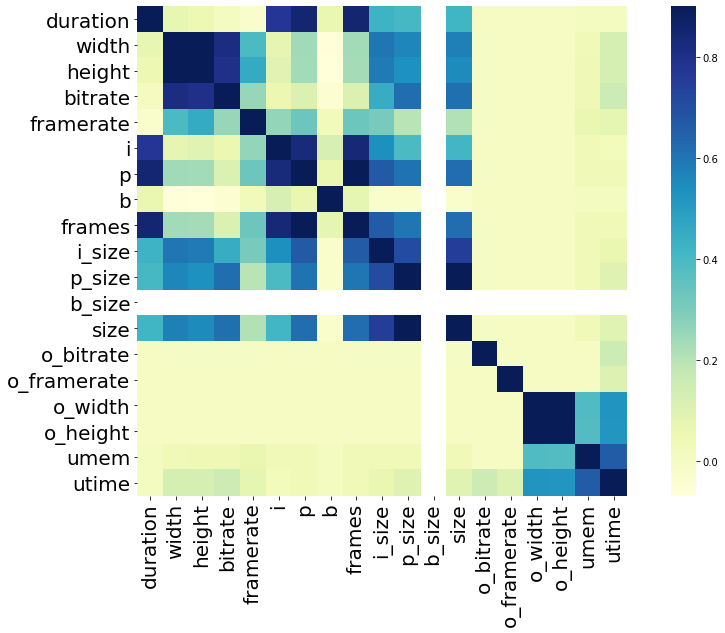

In [12]:
# For bike dataset
fig, ax = plt.subplots(1,1,figsize=(16,9))
plt.xticks(rotation = 90,fontsize=20)
plt.yticks(fontsize=20)
sns.heatmap(BIKE_DATA.corr(), vmax=0.9, cmap="YlGnBu", square=True)

# For video dataset
fig, ax = plt.subplots(1,1,figsize=(16,9))
plt.xticks(rotation = 90,fontsize=20)
plt.yticks(fontsize=20)
sns.heatmap(VIDEO_DATA.corr(),vmax=0.9, cmap="YlGnBu", square=True)
plt.show()

#### For Biking Dataset:
1) **temp** and **atemp** have the hishest correlation to **casual users**.

2) **year**, **temp** and **atemp** have the hishest correlation to **registered users**.

3) **year**, **temp** and **atemp** have the hishest correlation to **total users**.

This means the time (when) and the corresponding temperature at the time affects whether perople want to biking or not.

#### For Video Dataset:
Both **umem** and **utime** have the highest correlation with **o-width** and **0-height** which represent the output pixel size of the video. This make sence because the larger size of data (pixel), more memory and time needs for transcoding.

#### Q2: Historgram of numerical features.

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2961: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


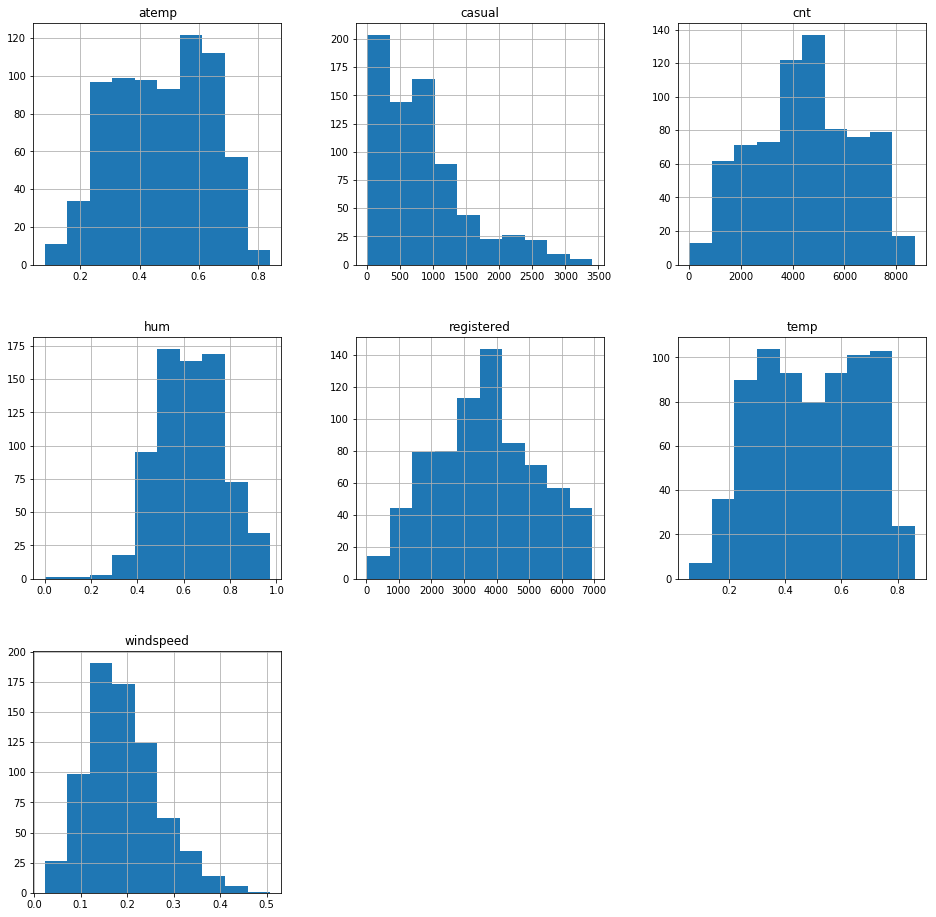

In [0]:
#Histogram of Numericl Data in Biking Dating:
data = pd.concat([Biking_Data['temp'], Biking_Data['atemp'], Biking_Data['hum'], Biking_Data['windspeed'], Biking_Data['casual'],  Biking_Data['registered'], Biking_Data['cnt']], axis=1)
fig, ax = plt.subplots(1,1,figsize=(16,16))
plt.xticks(rotation = 90,fontsize=20)
plt.yticks(fontsize=20)
data.hist(ax=ax)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2961: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


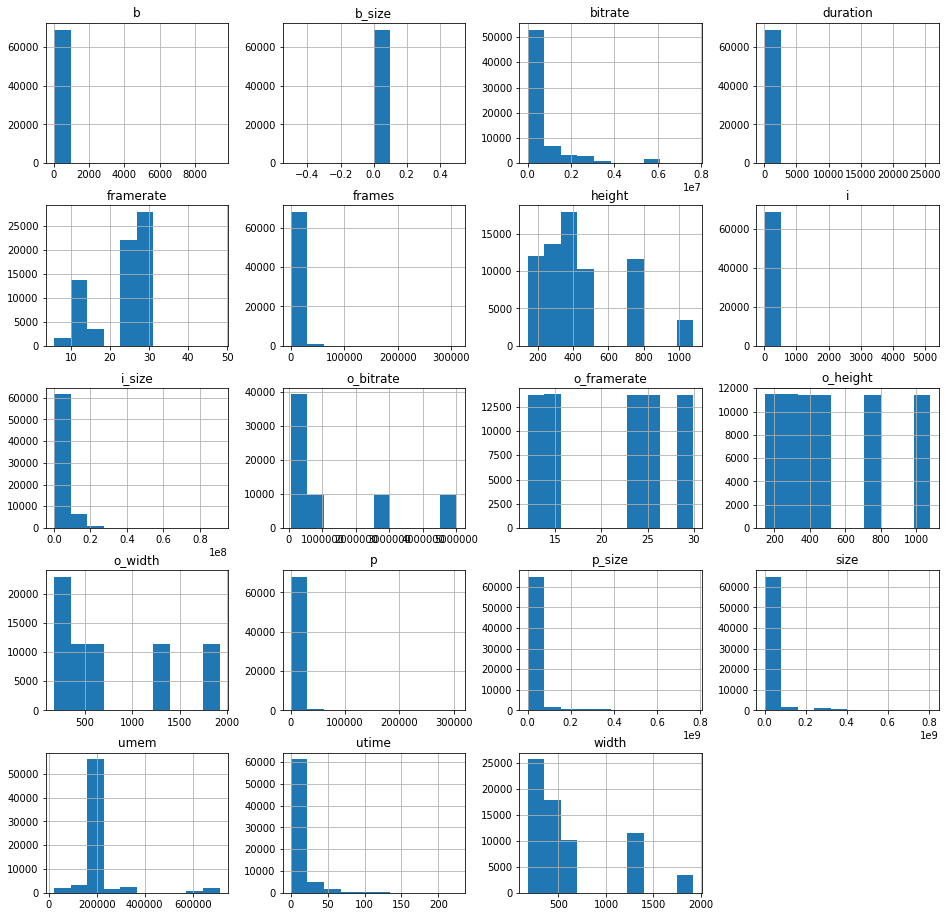

In [0]:
#Histogram of Numericl Data in Biking Dating:
data = pd.concat([Video_Data['duration'],Video_Data['width'], Video_Data['height'], Video_Data['bitrate'], Video_Data['framerate'], Video_Data['i'],  Video_Data['p'], Video_Data['b'],
                 Video_Data['frames'],Video_Data['i_size'],Video_Data['p_size'],Video_Data['b_size'],Video_Data['size'],Video_Data['o_bitrate'],Video_Data['o_framerate'],
                 Video_Data['o_width'],Video_Data['o_height'],Video_Data['umem'],Video_Data['utime']], axis=1)
fig, ax = plt.subplots(1,1,figsize=(16,16))
plt.xticks(rotation = 90,fontsize=12)
plt.yticks(fontsize=20)
data.hist(ax=ax)
plt.show()

If the distribution has high skewness (left or right), we can use log tranformation or standardization.

#### Q3:Box plot of categorical data.

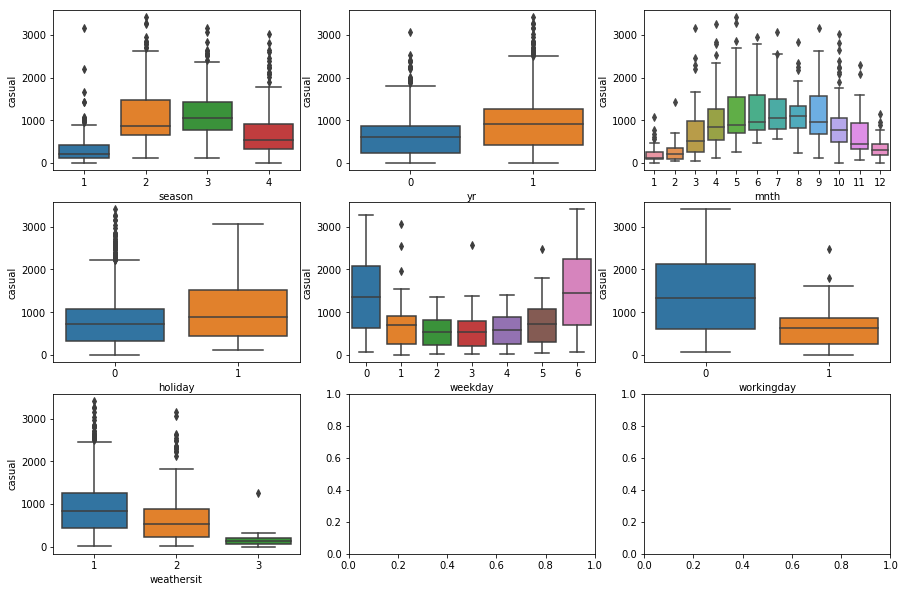

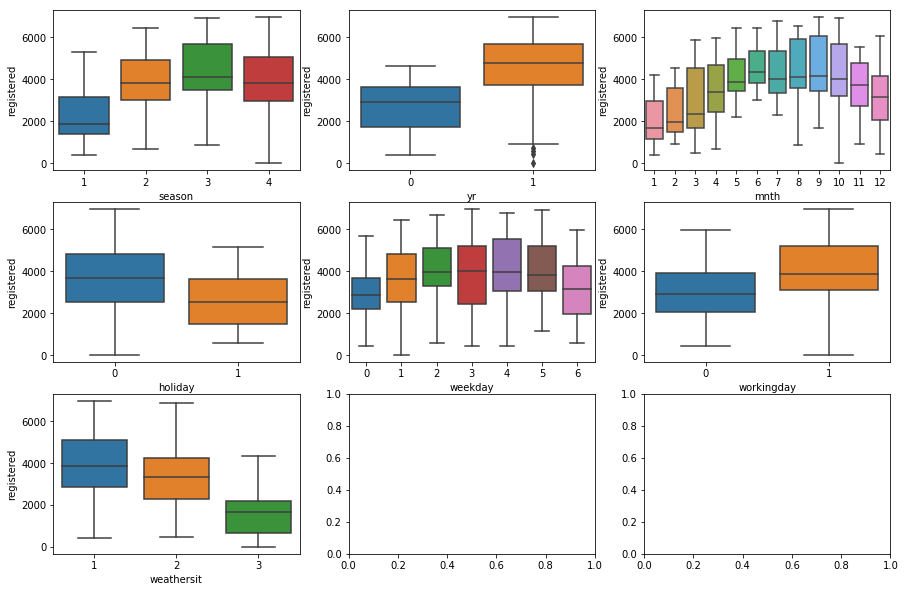

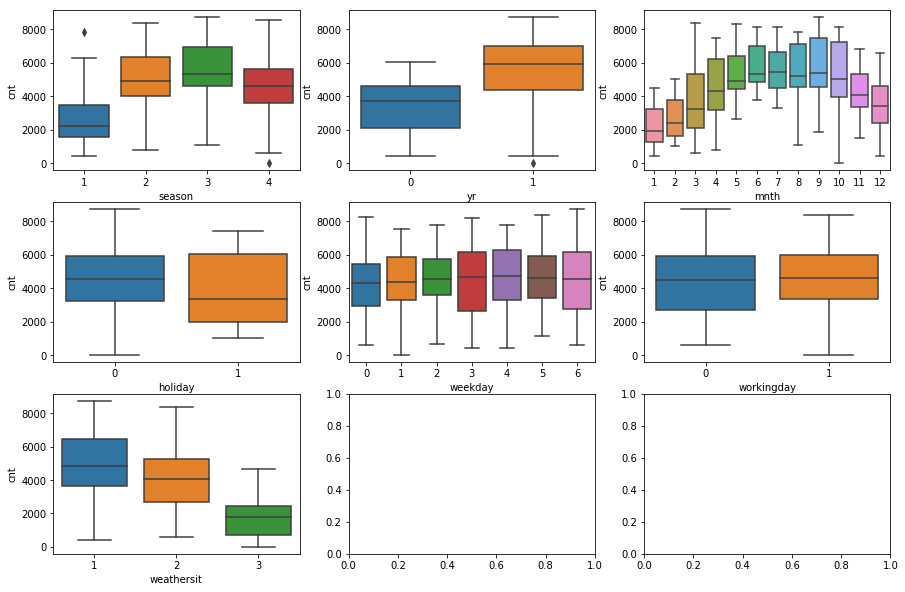

In [0]:
categorical = ['season','yr','mnth','holiday','weekday','workingday','weathersit']

# categorical v.s. casual
fig, ax = plt.subplots(3, 3, figsize=(15, 10))
for var, subplot in zip(categorical, ax.flatten()):
    sns.boxplot(x=var, y='casual', data=Biking_Data, ax=subplot)

# categorical v.s. registered
fig, ax = plt.subplots(3, 3, figsize=(15, 10))
for var, subplot in zip(categorical, ax.flatten()):
    sns.boxplot(x=var, y='registered', data=Biking_Data, ax=subplot)

# categorical v.s. cnt
fig, ax = plt.subplots(3, 3, figsize=(15, 10))
for var, subplot in zip(categorical, ax.flatten()):
    sns.boxplot(x=var, y='cnt', data=Biking_Data, ax=subplot)

For Biking data, it looks like what we observed in heatmap. The warmer (temparature) time (season and month), the higer the counts.

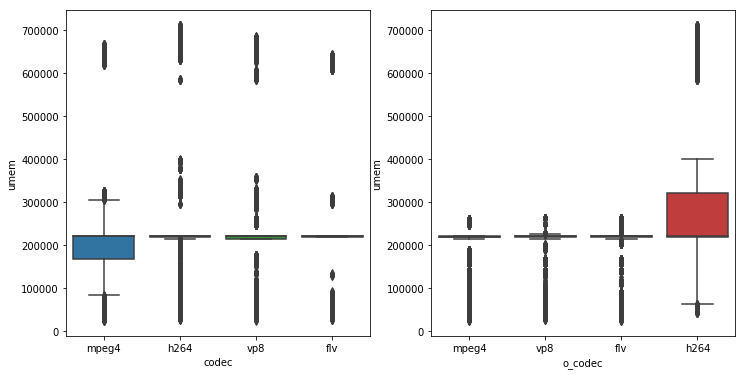

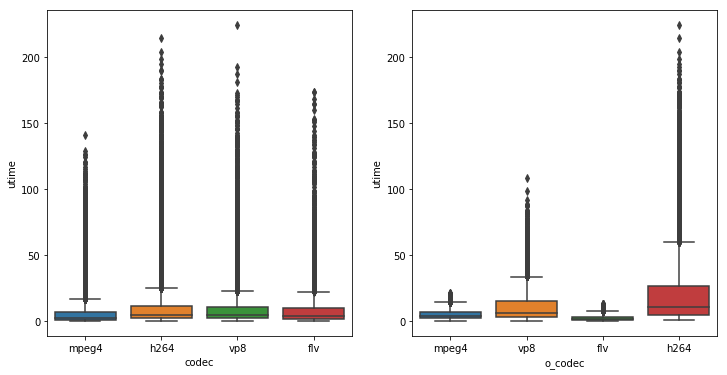

In [0]:
categorical = ['codec','o_codec']

# categorical v.s. umem
fig, ax = plt.subplots(1,2, figsize=(12, 6))
for var, subplot in zip(categorical, ax.flatten()):
    sns.boxplot(x=var, y='umem', data=Video_Data, ax=subplot)

# categorical v.s. utime
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
for var, subplot in zip(categorical, ax.flatten()):
    sns.boxplot(x=var, y='utime', data=Video_Data, ax=subplot)

For video data, it seems like **mpeg4** and **h264** formats need more memory for transcoding. **h264** needs more time for transcoding.

#### Q4:

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


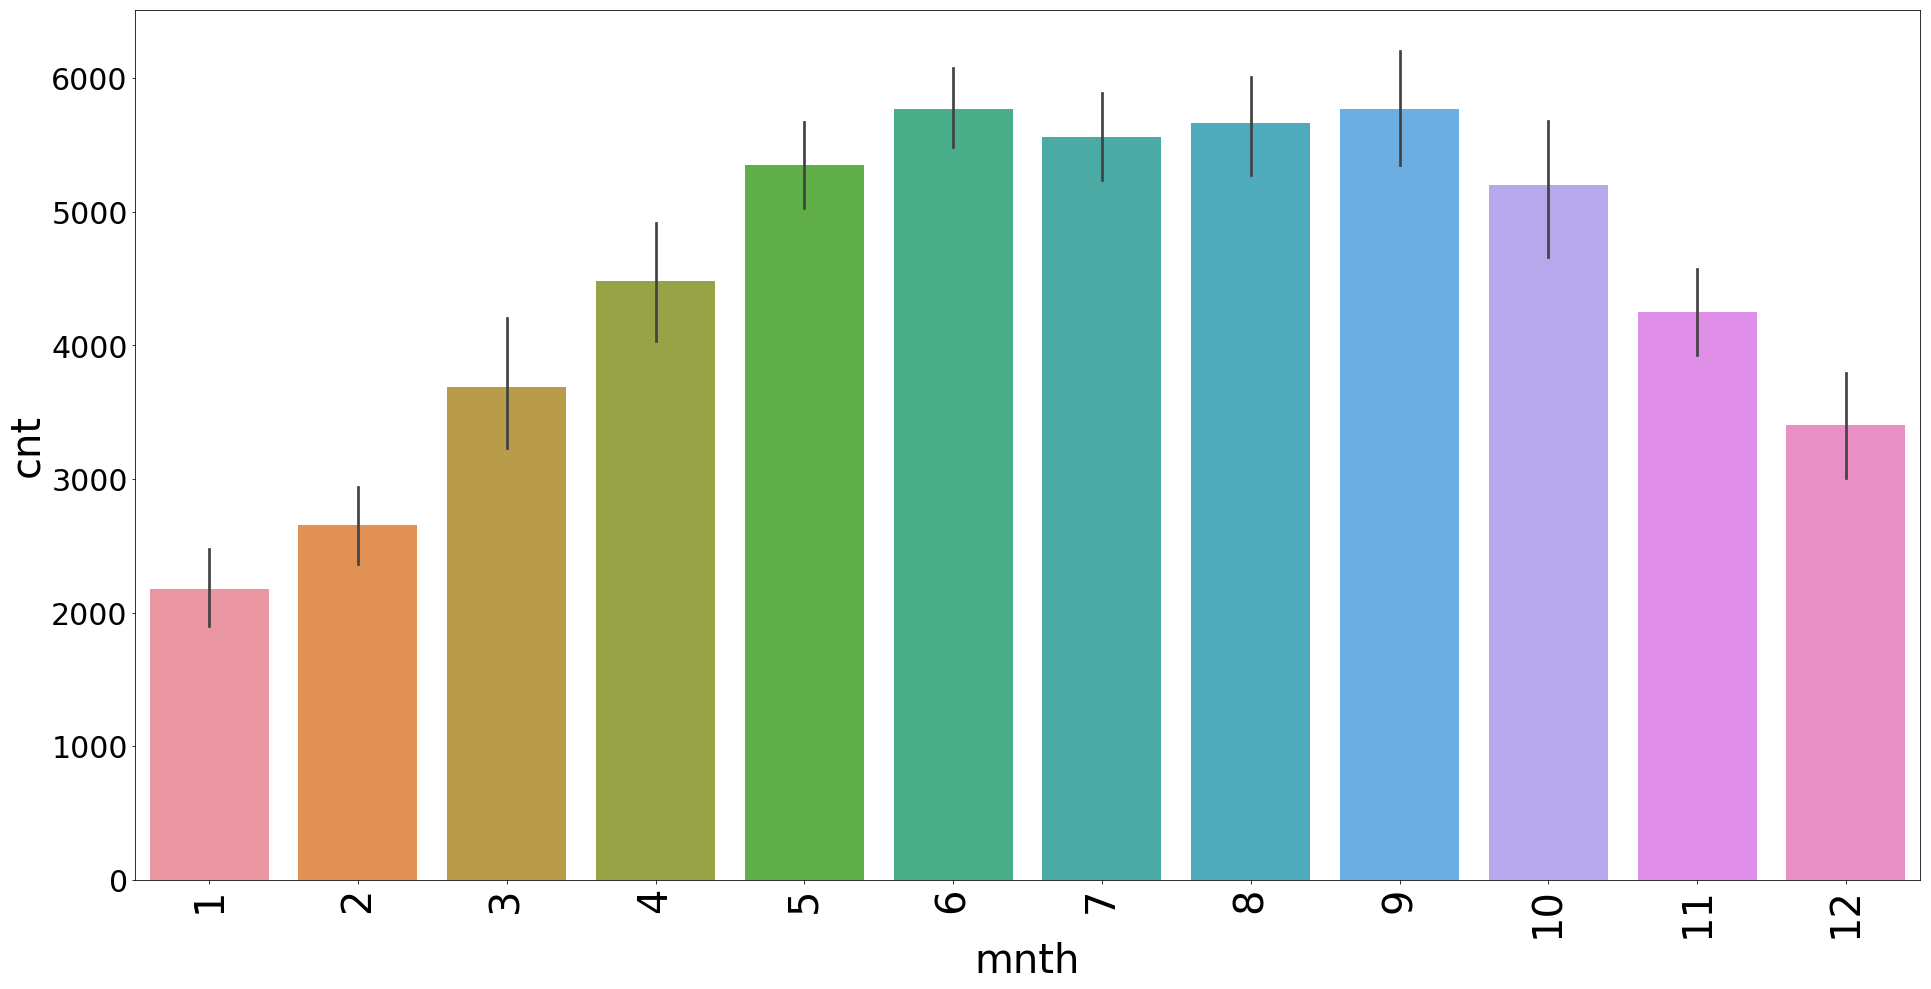

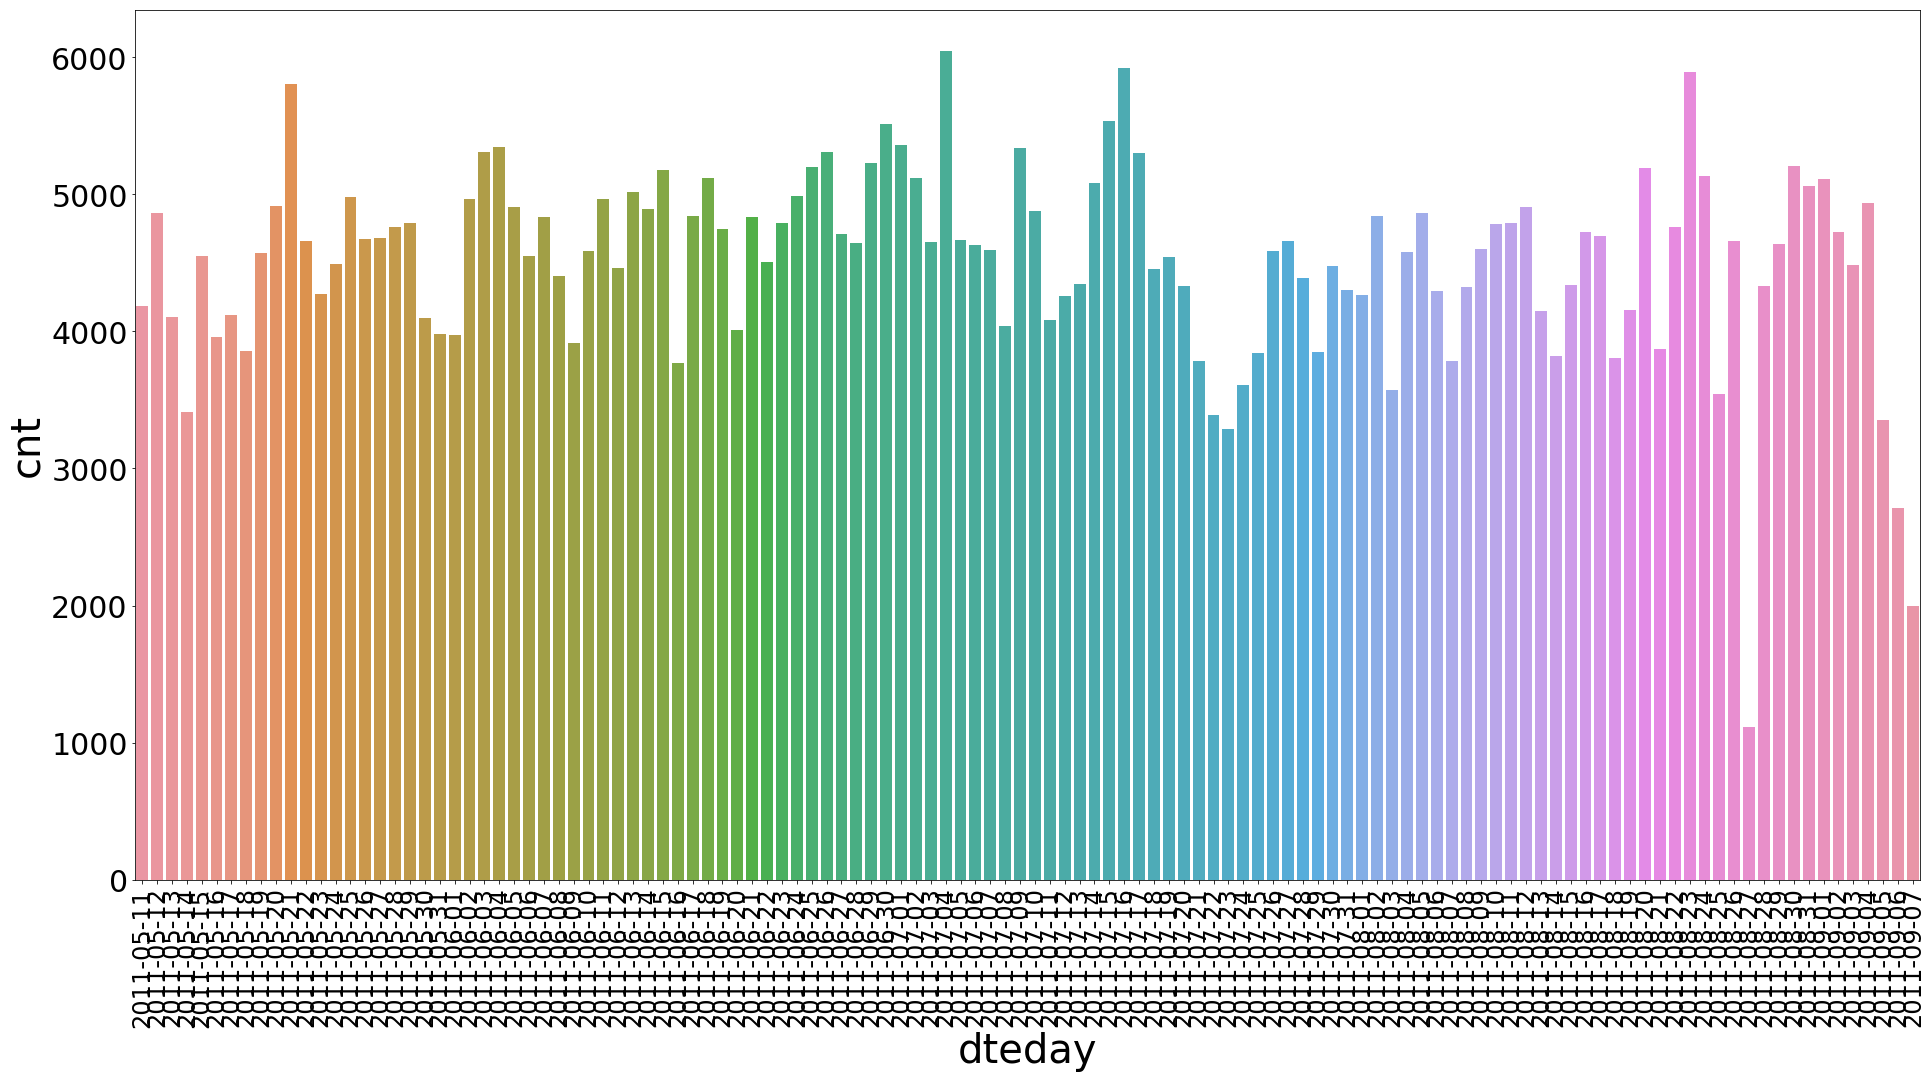

In [0]:
data = pd.concat([Biking_Data['mnth'], Biking_Data['cnt']], axis=1)
f, ax = plt.subplots(figsize=(32, 16))
plt.xticks(rotation = 90,fontsize=40)
plt.yticks(fontsize=30)
ax.set_xlabel('mnth', fontsize=40)
ax.set_ylabel('cnt', fontsize=40)
fig = sns.barplot(x='mnth', y='cnt', data=data)

data = pd.concat([Biking_Data['dteday'][130:250], Biking_Data['cnt'][130:250]], axis=1)
f, ax = plt.subplots(figsize=(32, 16))
plt.xticks(rotation = 90,fontsize=24)
plt.yticks(fontsize=30)
ax.set_xlabel('dteday', fontsize=40)
ax.set_ylabel('cnt', fontsize=40)
fig = sns.barplot(x='dteday', y='cnt', data=data)

For biking, it seems like people who use bicycles will be lesser in approaching the end of month compared to the beginning of the month.

#### Q5:

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


count    68784.000000
mean         9.996355
std         16.107429
min          0.184000
25%          2.096000
50%          4.408000
75%         10.433000
max        224.574000
Name: utime, dtype: float64

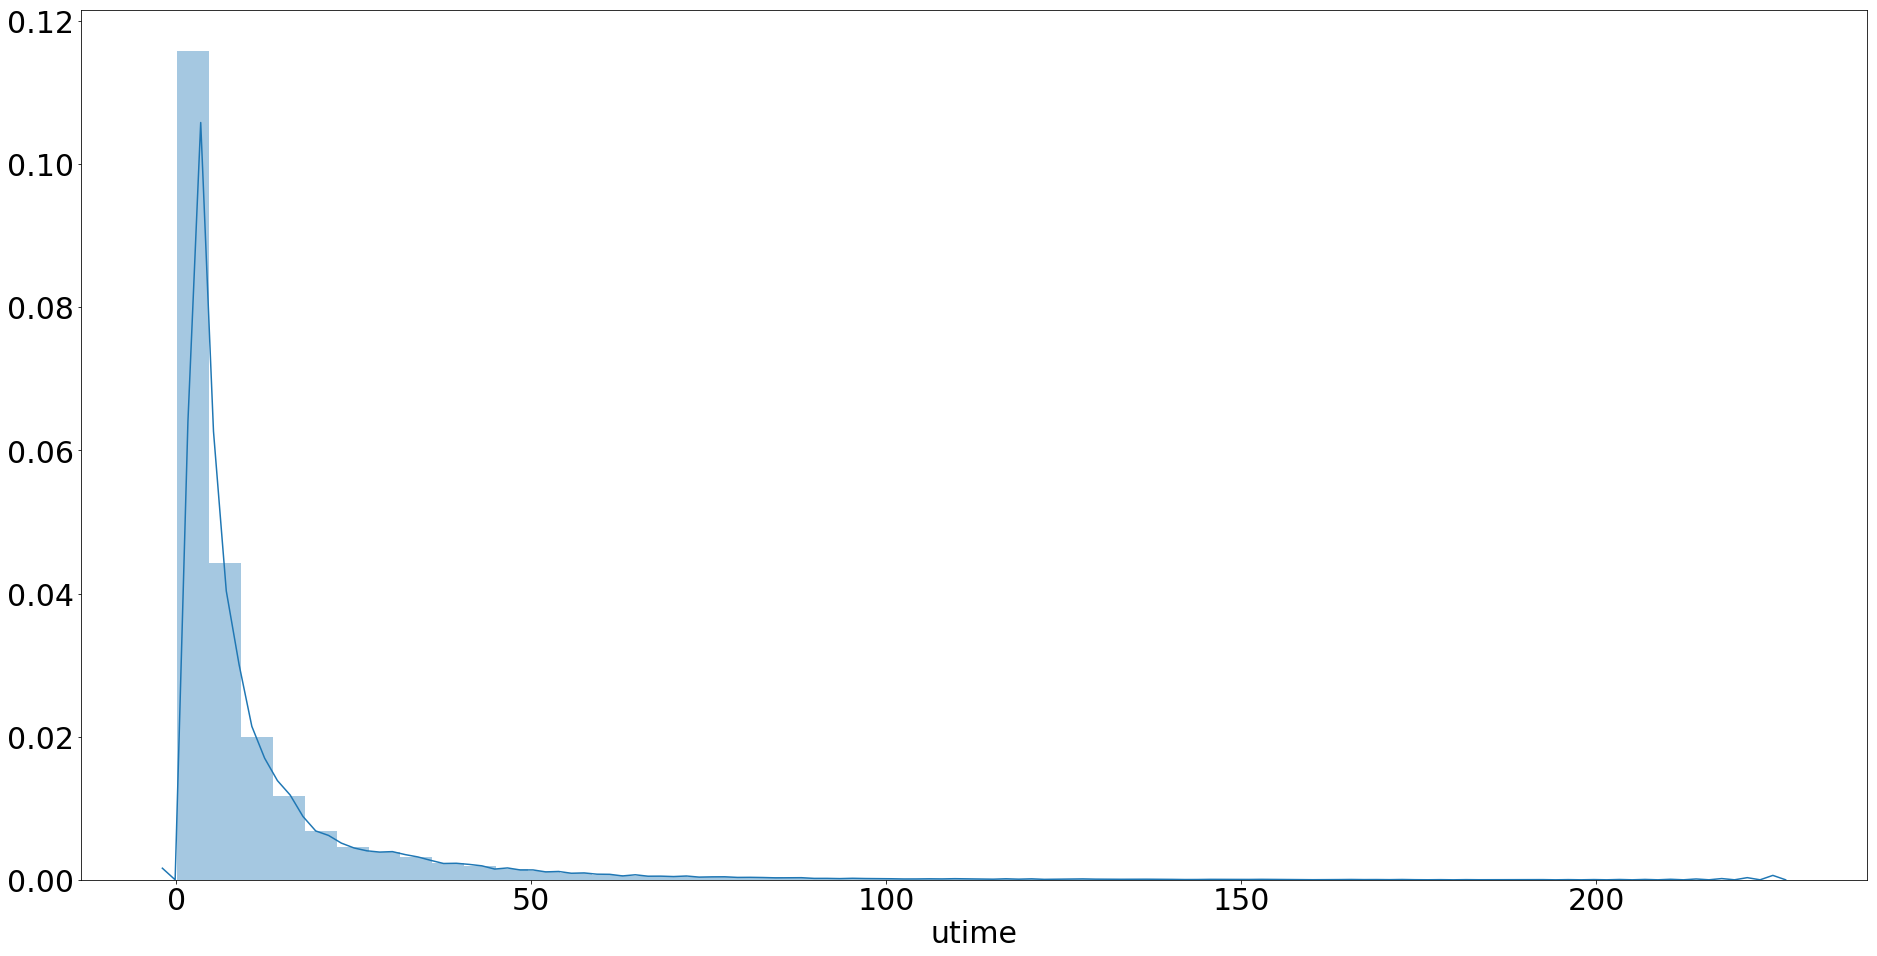

In [0]:
fig, ax = plt.subplots(1,1,figsize=(32,16))
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
ax.set_xlabel('utime', fontsize=30)
sns.distplot(Video_Data['utime'])
Video_Data['utime'].describe()

The transcoding time is very left-skewness, and the mean is 9.996355 and the median is 4.408.

#### Q6:
When using one-hot encoding, one will ignore whether there is a correlation for levels in one categorical (e.g., 1, 2, 3, 4, 5). In the sametime, using one-hot encoding will increase create an sparse matrix, which may cause some problem for example, overfitting. 

Using scalar encoding means we assume there exist an ordering relationship in the categorical data.

#### Q7: Standardization and Preparing Data for Training

In [0]:
from sklearn import preprocessing

# Create the Scaler object
scaler = preprocessing.StandardScaler()


#Biking Data:
Bike_X = pd.concat([Biking_Data['temp'], Biking_Data['atemp'], Biking_Data['hum'], Biking_Data['windspeed'],
                   Biking_Data['season'],Biking_Data['yr'],Biking_Data['mnth'],Biking_Data['holiday'],
                   Biking_Data['workingday'],Biking_Data['weathersit']],axis=1)
Bike_Standard_X = scaler.fit_transform(Bike_X)
Bike_Y = pd.concat([Biking_Data['cnt']], axis=1)

#Biking Data:
Video_X = pd.concat([Video_Data['bitrate'], Video_Data['framerate'], Video_Data['frames'], Video_Data['height'],
                   Video_Data['i_size'],Video_Data['o_bitrate'],Video_Data['o_framerate'],Video_Data['o_height'],
                   Video_Data['o_width'],Video_Data['p_size'], Video_Data['size'], Video_Data['width'],
                   Video_Data['codec'],Video_Data['o_codec']],axis=1)
#one-hot encoding
Video_X = pd.get_dummies(Video_X)
Video_Standard_X = scaler.fit_transform(Video_X)
Video_Y = pd.concat([Video_Data['utime']], axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
